In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import utils

path = "DATA_TP_FINAL/"

NUM = 27

# Chargement de vos données app et dec
data_app = pd.read_csv(path+f'data_app/data_app_{NUM}.csv',sep='\t')
data_dec = pd.read_csv(path+f'data_dec/data_dec_{NUM}.csv',sep='\t')

results = pd.read_csv('results_corrections.csv',sep=',',index_col=0).loc[NUM]

# Partie 1

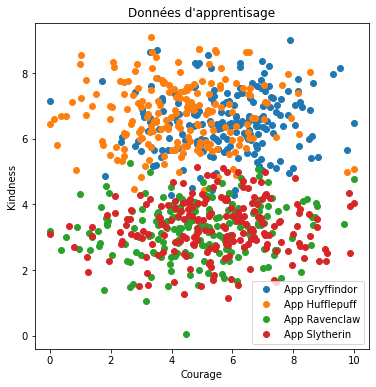

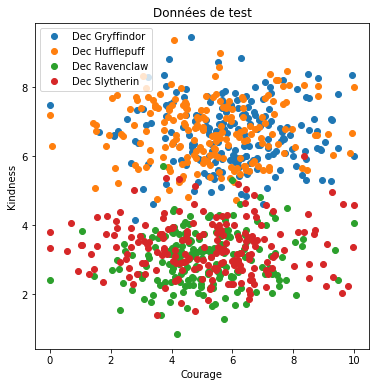

In [2]:
labels_app, data_labels_app = utils.split_data(data_app,"House")
labels_dec, data_labels_dec = utils.split_data(data_dec,"House")

# Affichage des données app en fonction des variables Courage et Kindness
app_labels = [f"App {l}" for l in labels_app]
app_x = [d['Courage'] for d in data_labels_app]
app_y = [d['Kindness'] for d in data_labels_app]
utils.plot_2_var(app_labels,app_x,app_y,"Données d'apprentisage",var1='Courage',var2='Kindness')

# Affichage des données dec en fonction des variables Courage et Kindness
dec_labels = [f"Dec {l}" for l in labels_dec]
dec_x = [d['Courage'] for d in data_labels_dec]
dec_y = [d['Kindness'] for d in data_labels_dec]
utils.plot_2_var(dec_labels,dec_x,dec_y,"Données de test",var1='Courage',var2='Kindness')

In [3]:
tab_CD = pd.DataFrame(columns = ['Classifieur','Top 1', 'Top 2'])
tab_CD.set_index('Classifieur')
tab_CD['Classifieur'] = ['Distance Euclidienne Minimum','Distance Mahalanobis Minimum']
tab_CD['Top 1'] = [results['CDE_first_top1'],results['CDM_first_top1']]
tab_CD['Top 2'] = [results['CDE_first_top2'],results['CDM_first_top2']]
tab_CD

Classifieur   Top 1  Top 2
0  Distance Euclidienne Minimum  0.5563  0.955
1  Distance Mahalanobis Minimum  0.5587  0.980

In [4]:
tab_PA = pd.DataFrame(columns = ['Classifieur','h optimal','Top 1', 'Top 2'])
tab_PA.set_index('Classifieur')
tab_PA['Classifieur'] = ['Parzen avec noyau uniforme','Parzen avec noyau gaussien']
tab_PA['h optimal'] = [results['PU_first_h'],results['PG_first_h']]
tab_PA['Top 1'] = [results['PU_first_top1'],results['PG_first_top1']]
tab_PA['Top 2'] = [results['PU_first_top2'],results['PG_first_top2']]
tab_PA

Classifieur  h optimal   Top 1   Top 2
0  Parzen avec noyau uniforme        3.5  0.5687  0.9762
1  Parzen avec noyau gaussien        4.1  0.5563  0.9625

In [5]:
tab_KP = pd.DataFrame(columns = ['Classifieur','k optimal','Top 1', 'Top 2'])
tab_KP.set_index('Classifieur')
tab_KP['Classifieur'] = ['KPPV avec vote majoritaire','KPPV avec vote unanime']
tab_KP['k optimal'] = [results['KM_first_h'],results['KU_first_h']]
tab_KP['Top 1'] = [results['KM_first_top1'],results['KU_first_top1']]
tab_KP['Top 2'] = [results['KM_first_top2'],results['KU_first_top2']]
tab_KP

Classifieur  k optimal   Top 1   Top 2
0  KPPV avec vote majoritaire          9  0.5625  0.9725
1      KPPV avec vote unanime          2  0.2725  0.2725

# Partie 2

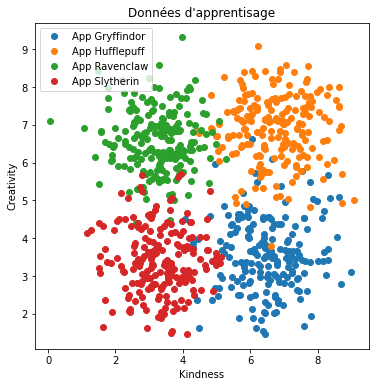

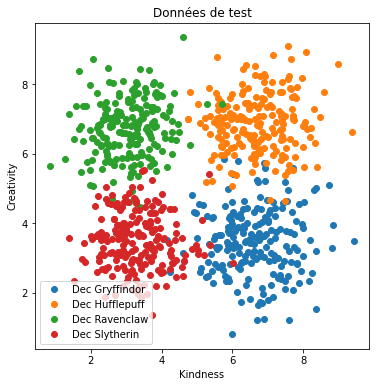

In [6]:
# Affichage des données app en fonction des variables Courage et Kindness
app_labels = [f"App {l}" for l in labels_app]
app_x = [d[results['qual1']] for d in data_labels_app]
app_y = [d[results['qual2']] for d in data_labels_app]
utils.plot_2_var(app_labels,app_x,app_y,"Données d'apprentisage",var1=results['qual1'],var2=results['qual2'])

# Affichage des données dec en fonction des variables Courage et Kindness
dec_labels = [f"Dec {l}" for l in labels_dec]
dec_x = [d[results['qual1']] for d in data_labels_dec]
dec_y = [d[results['qual2']] for d in data_labels_dec]
utils.plot_2_var(dec_labels,dec_x,dec_y,"Données de test",var1=results['qual1'],var2=results['qual2'])

In [7]:
tab = pd.DataFrame(columns = ['Classifieur','h/k optimal','Top 1', 'Top 2'])
tab.set_index('Classifieur')
tab['Classifieur'] = ['Distance Euclidienne Minimum','Distance Mahalanobis Minimum','Parzen avec noyau uniforme','Parzen avec noyau gaussien','KPPV avec vote majoritaire','KPPV avec vote unanime']
tab['h/k optimal'] = ['/','/',results['PU_true_h'],results['PG_true_h'],results['KM_true_h'],results['KU_true_h']]
tab['Top 1'] = [results['CDE_true_top1'],results['CDM_true_top1'],results['PU_true_top1'],results['PG_true_top1'],results['KM_true_top1'],results['KU_true_top1']]
tab['Top 2'] = [results['CDE_true_top2'],results['CDM_true_top2'],results['PU_true_top2'],results['PG_true_top2'],results['KM_true_top2'],results['KU_true_top2']]
tab

Classifieur h/k optimal   Top 1   Top 2
0  Distance Euclidienne Minimum           /  0.9475  0.9988
1  Distance Mahalanobis Minimum           /  0.9525  0.9988
2    Parzen avec noyau uniforme         6.7  0.9425  0.9975
3    Parzen avec noyau gaussien         0.4  0.9463  0.9988
4    KPPV avec vote majoritaire           7  0.9525  0.9950
5        KPPV avec vote unanime           2  0.8812  0.8812

In [8]:
HOUSE = results['student_house']
print("Maison de l'étudiante : "+HOUSE)

Maison de l'étudiante : Hufflepuff


In [9]:
from IPython.display import Markdown as md
md('<img src="Hogwart houses/{}_Crest.png" width="400">'.format(HOUSE))

<img src="Hogwart houses/Hufflepuff_Crest.png" width="400">